In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [25]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [26]:
titanic.isna().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [27]:
# Fill missing 'age' with the median value
titanic['age'].fillna(titanic['age'].median(), inplace=True)
# Fill missing 'embarked' with the mode
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)
# Drop the 'deck' column due to many missing values
titanic.drop(columns=['deck'], inplace=True)
# Drop rows with missing 'embark_town'
titanic.dropna(subset=['embark_town'], inplace=True)
# Verify data cleaning
print(titanic.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


/tmp/ipython-input-3610751045.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
/tmp/ipython-input-3610751045.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

## EDA (Exploratory Data Analysis)

### Distribution of passenger ages

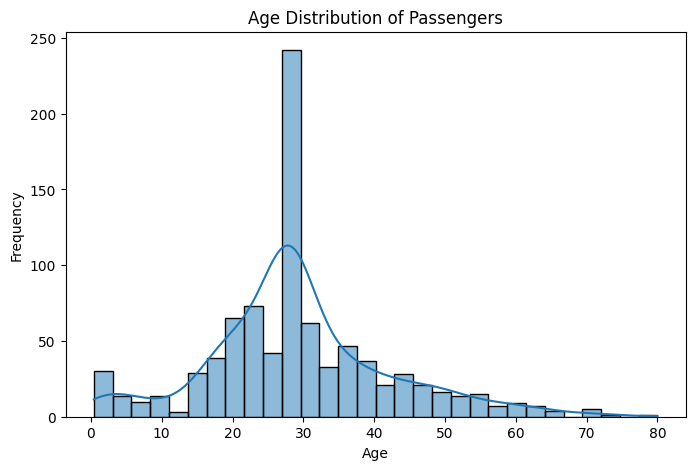

In [28]:
plt.figure(figsize=(8, 5))
sns.histplot(titanic['age'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The most passengers are in late 20s and the most age exist is 28-29

### Survival count by gender

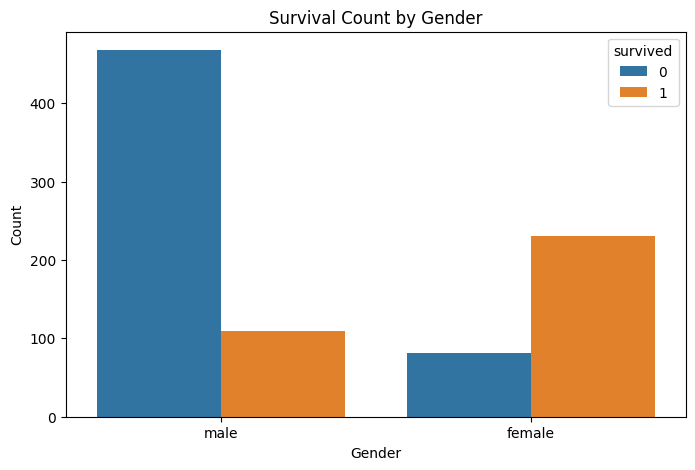

In [29]:
plt.figure(figsize=(8, 5))
sns.countplot(x='sex', hue='survived', data=titanic)
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

The rate of male survived is less than the rate of female survived

### Correlation matrix heatmap

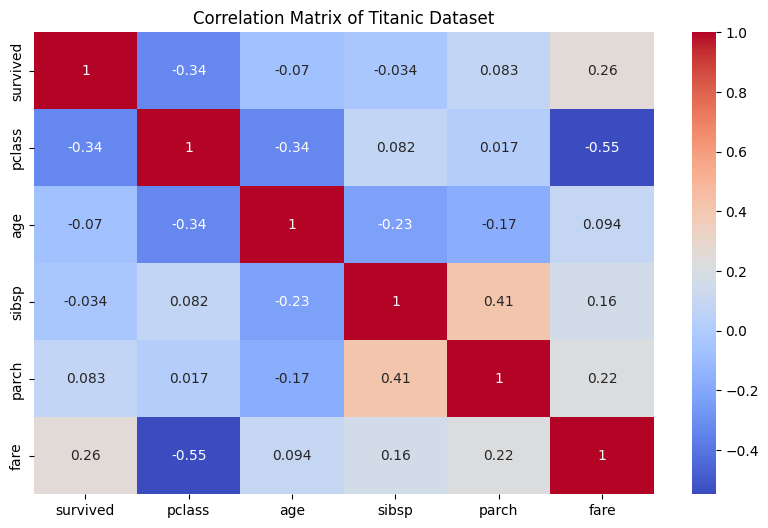

In [30]:
# Select only numerical columns for the correlation matrix
numerical_titanic = titanic.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr = numerical_titanic.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Titanic Dataset')
plt.show()

### Survival by class

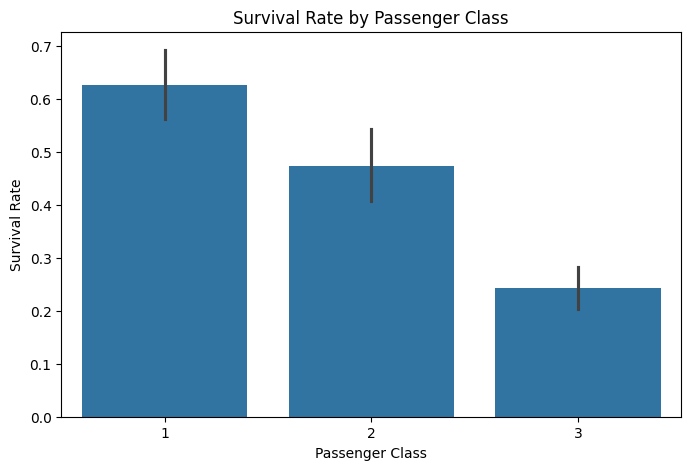

In [31]:
plt.figure(figsize=(8, 5))
sns.barplot(x='pclass', y='survived', data=titanic)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

### Survival based on fare

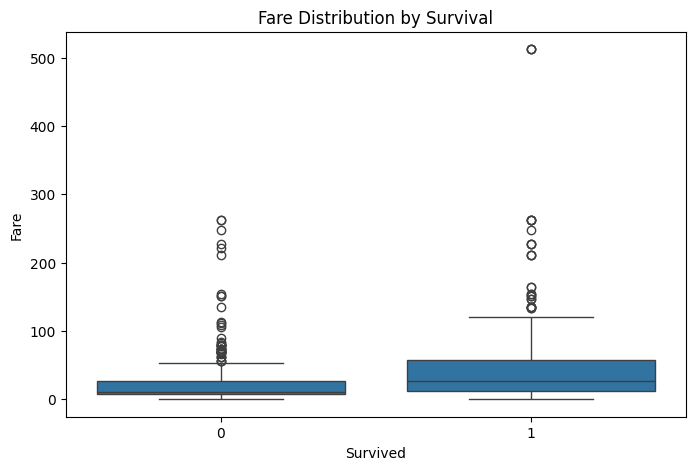

In [32]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='survived', y='fare', data=titanic)
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

### Age vs Fare by Survival

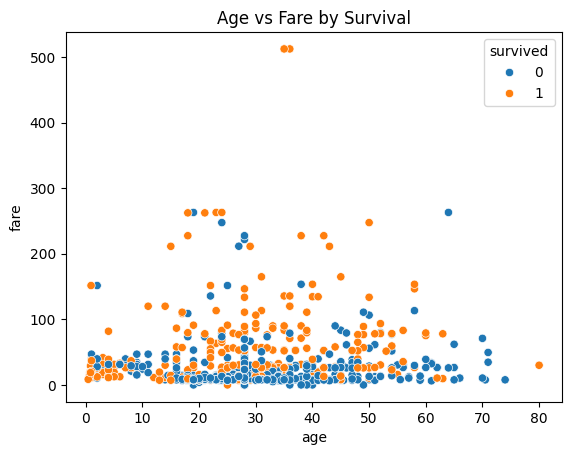

In [33]:
sns.scatterplot(x='age', y='fare', hue='survived', data=titanic)
plt.title('Age vs Fare by Survival')
plt.show()

Age distribution by passenger class


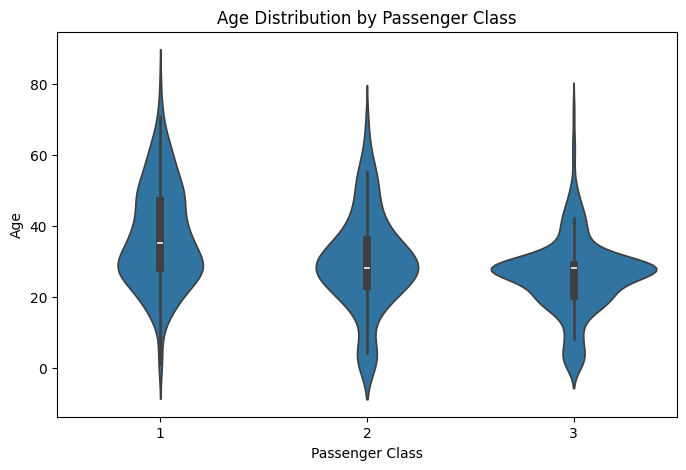

In [34]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='pclass', y='age', data=titanic)
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

### Boxplot of fare by embarkation port

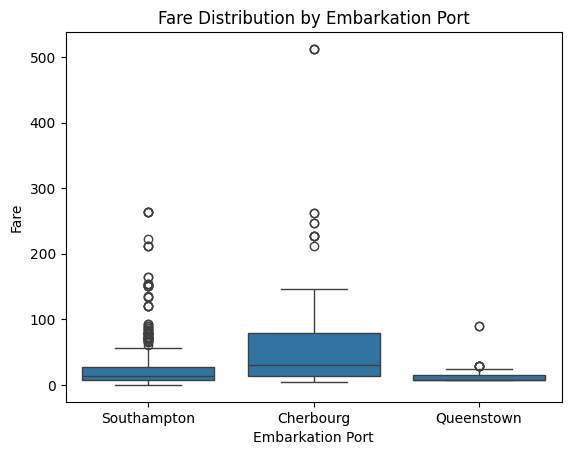

In [35]:
sns.boxplot(x='embark_town', y='fare', data=titanic)
plt.xlabel('Embarkation Port')
plt.ylabel('Fare')
plt.title('Fare Distribution by Embarkation Port')
plt.show()

## Feature Engineering

In [36]:
titanic['family_size'] = titanic['sibsp'] + titanic['parch']
titanic['is_alone'] = np.where(titanic['family_size'] > 0, 0, 1)
print(titanic[['family_size', 'is_alone']].head())

   family_size  is_alone
0            1         0
1            1         0
2            0         1
3            1         0
4            0         1


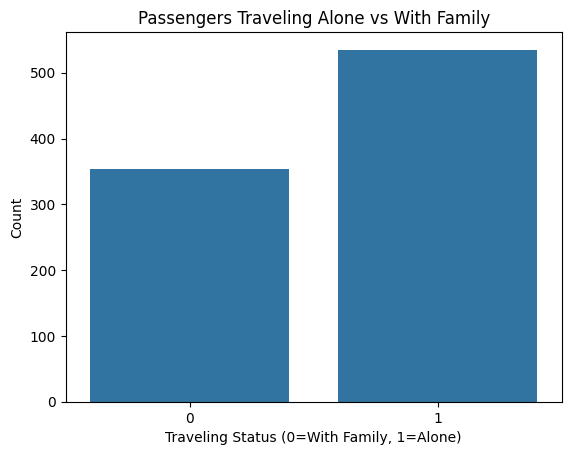

In [39]:
sns.countplot(x='is_alone', data=titanic)
plt.xlabel('Traveling Status (0=With Family, 1=Alone)')
plt.ylabel('Count')
plt.title('Passengers Traveling Alone vs With Family')
plt.show()

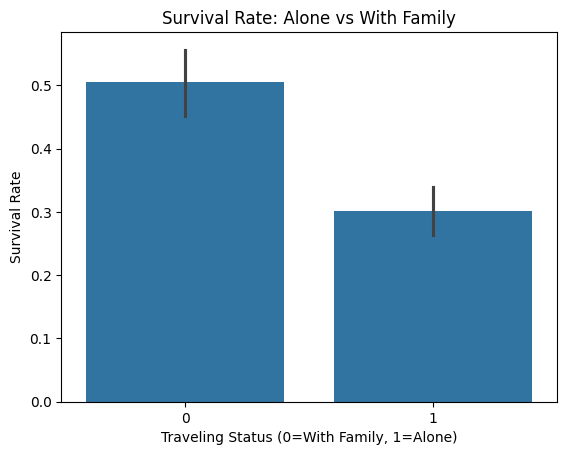

In [40]:
sns.barplot(x='is_alone', y='survived', data=titanic)
plt.xlabel('Traveling Status (0=With Family, 1=Alone)')
plt.ylabel('Survival Rate')
plt.title('Survival Rate: Alone vs With Family')
plt.show()

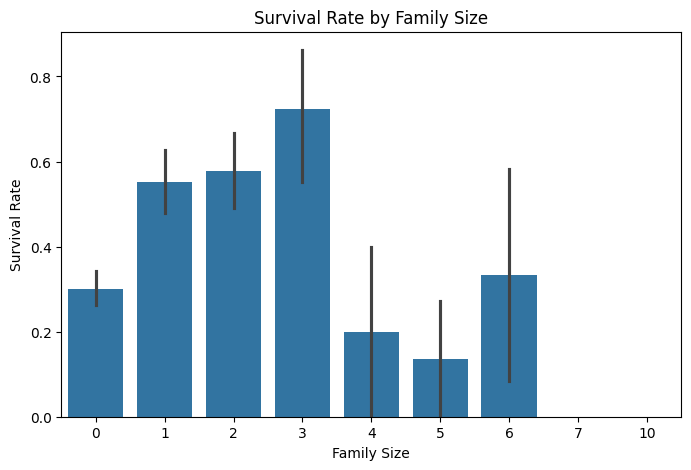

In [37]:
plt.figure(figsize=(8, 5))
sns.barplot(x='family_size', y='survived', data=titanic)
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

## Summary of Exploratory Data Analysis



*   **Age Distribution**: Most passengers were young adults, with a significant number of children and elderly individuals.

*   **Gender and Survival**: Women had a higher survival rate compared to men, reflecting the "women and children first" policy.

*   **Passenger Class and Survival**: First-class passengers had higher survival rates than those in lower classes, showing a class-based disparity in survival chances.

*   **Fare Influence**: Higher fare payments correlated with better survival odds, likely due to better access to lifeboats.
*   List item


*   **Family Size and Survival**: Moderate family sizes had higher survival rates; passengers traveling alone had lower survival chances.


*   **Embarkation Town**: Passengers who embarked at certain towns had varying survival rates, potentially reflecting different socioeconomic backgrounds.

